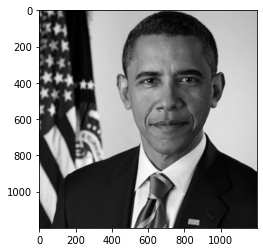

In [222]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

image = cv2.imread('Obama.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
gray = gray.astype("float32")/255
plt.imshow(gray ,cmap = 'gray')
plt.show()

In [223]:
l1_filter = np.zeros((3,3,3))

#horizontal 
l1_filter[0::] = [[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]]
#general 
l1_filter[1::] = [[0,-1,0],
                  [-1,4,-1],
                  [0,-1,0]]
#vertical 
l1_filter[2::] = [[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]]

class CNN(nn.Module):
    def __init__(self,weight):
        
        super(CNN, self).__init__()
        
        """
        Convolutional layer that contains input, output and kernel (or filter) sizes. 
        Input size will be 1 as we work with grayscale images.
        Output size is the amount of filters we want to apply
        """
        
        num_filters = 3
        self.conv = nn.Conv2d(1, num_filters, kernel_size=(3, 3), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        return conv_x, activated_x, pooled_x


    
weight = torch.from_numpy(l1_filter).unsqueeze(1).type(torch.FloatTensor)
model = CNN(weight)

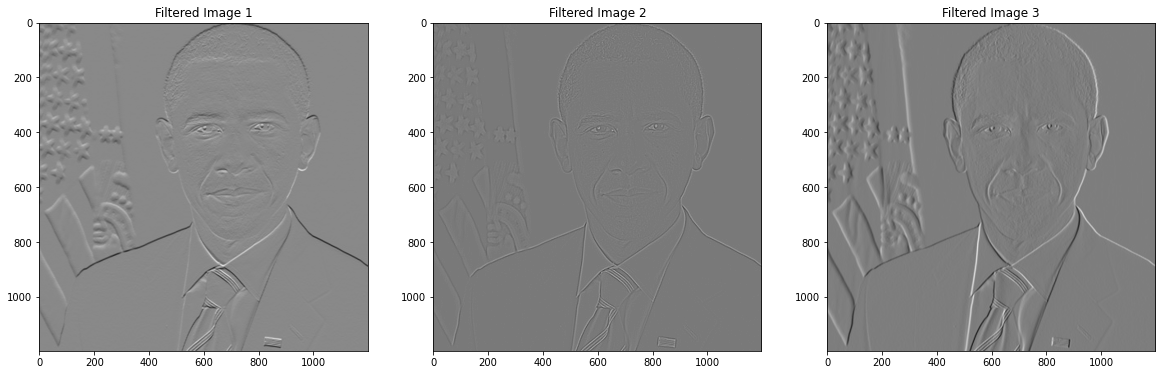

In [224]:
def layers(layer, n_filters= 3):
    fig = plt.figure(figsize=(20, 20))
    
    for filter in range(n_filters):
        axis = fig.add_subplot(1, n_filters, filter+1)
        axis.imshow(np.squeeze(layer[0,filter].data.numpy()), cmap='gray')
        axis.set_title('Filtered Image %s' % str(filter+1))

gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)
layers(conv_layer)

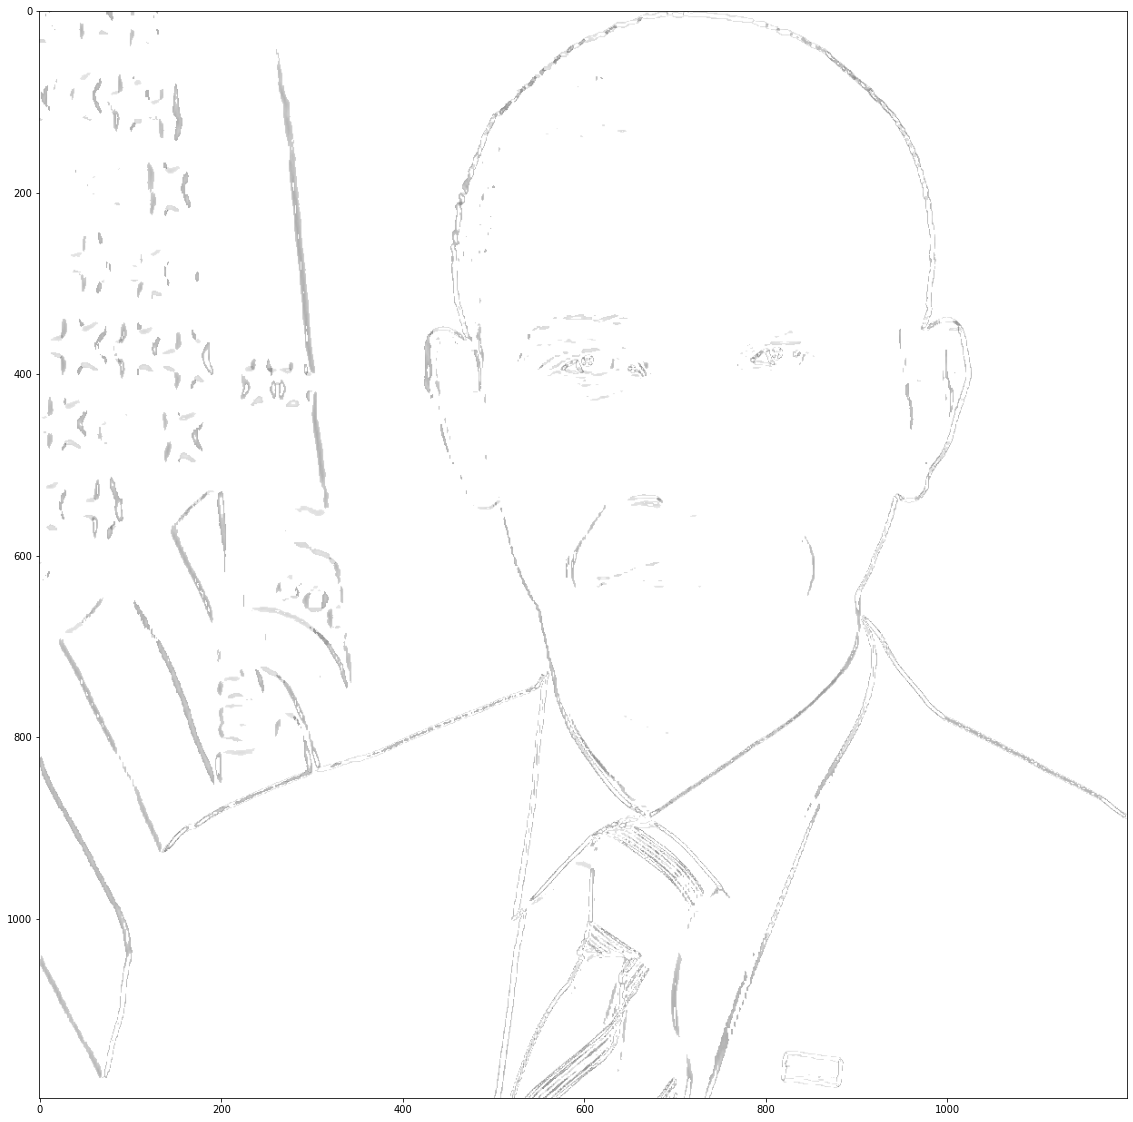

In [231]:
def bwcontour(conv_layer):
    def inverte(image):
        image = (255-image)
        return image
    fig = plt.figure(figsize=(20, 20))
    for i in range(3):
        edges = np.squeeze(conv_layer[0,i].data.numpy())
        backtorgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        img = (backtorgb * 255).astype(np.uint8)
        lower_range = np.array([96,96,96])  
        upper_range = np.array([160,160,160])

        mask = cv2.inRange(img,lower_range,upper_range)
        result = cv2.bitwise_and(img,img,mask = mask)
        if i==0:
            img1 = inverte(result)
        if i==1:
            img2 = inverte(result)
        else:
            img3 = inverte(result)

    # add or blend the images
    combined12 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0.0)
    combined = cv2.addWeighted(combined12, 0.5, img3, 0.5, 0.0)
    return combined

plt.imshow(bwcontour(conv_layer), cmap='gray')

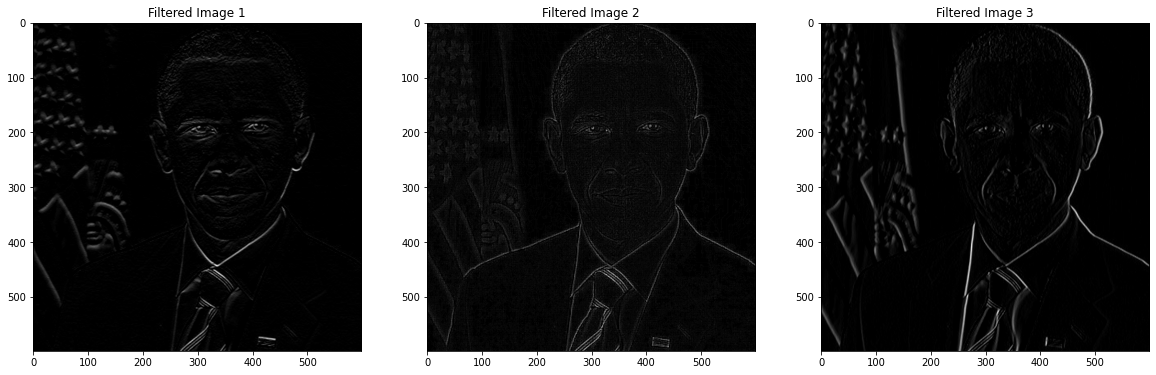

In [226]:
layers(pooled_layer)

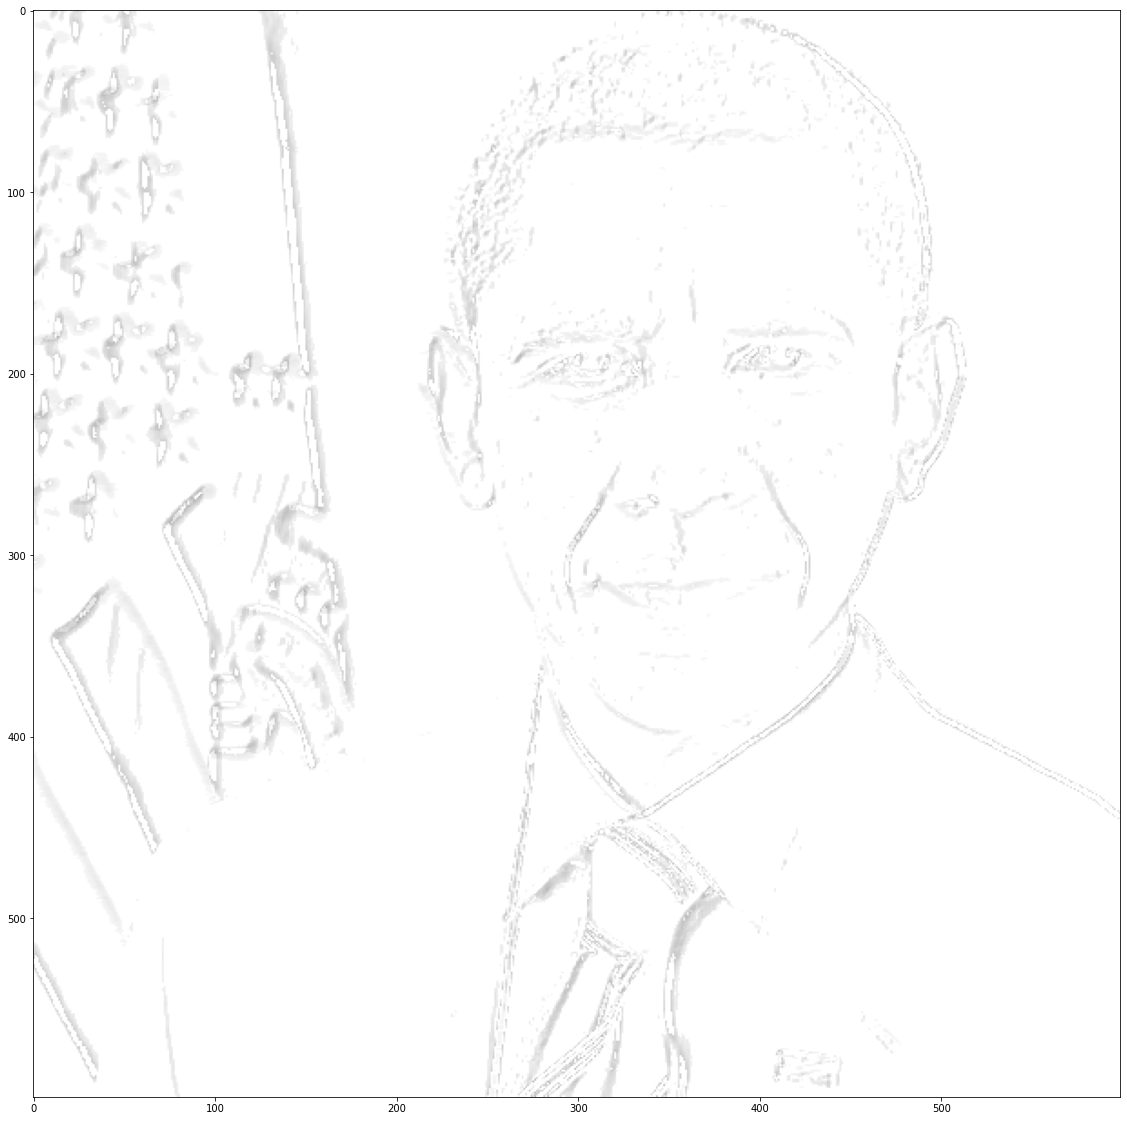

In [233]:
def bwcontour(conv_layer):
    def inverte(image):
        image = (255-image)
        return image
    fig = plt.figure(figsize=(20, 20))
    for i in range(3):
        edges = np.squeeze(conv_layer[0,i].data.numpy())
        backtorgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        img = (backtorgb * 255).astype(np.uint8)
        lower_range = np.array([30,30,30])  
        upper_range = np.array([100,100,100])

        mask = cv2.inRange(img,lower_range,upper_range)
        result = cv2.bitwise_and(img,img,mask = mask)
        if i==0:
            img1 = inverte(result)
        if i==1:
            img2 = inverte(result)
        else:
            img3 = inverte(result)

    # add or blend the images
    combined12 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0.0)
    combined = cv2.addWeighted(combined12, 0.5, img3, 0.5, 0.0)
    return combined

plt.imshow(bwcontour(pooled_layer), cmap='gray')

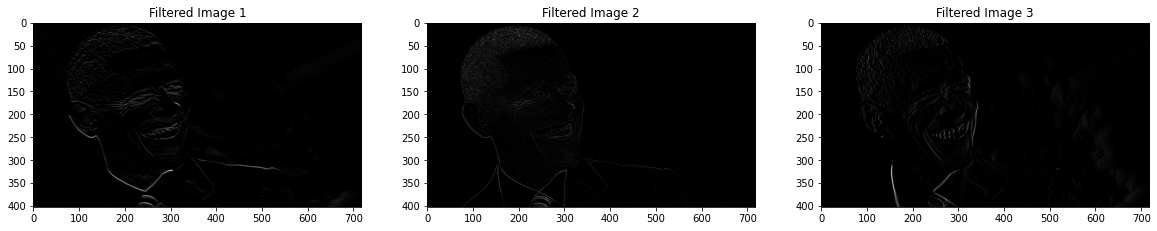

In [215]:
layers(activated_layer)

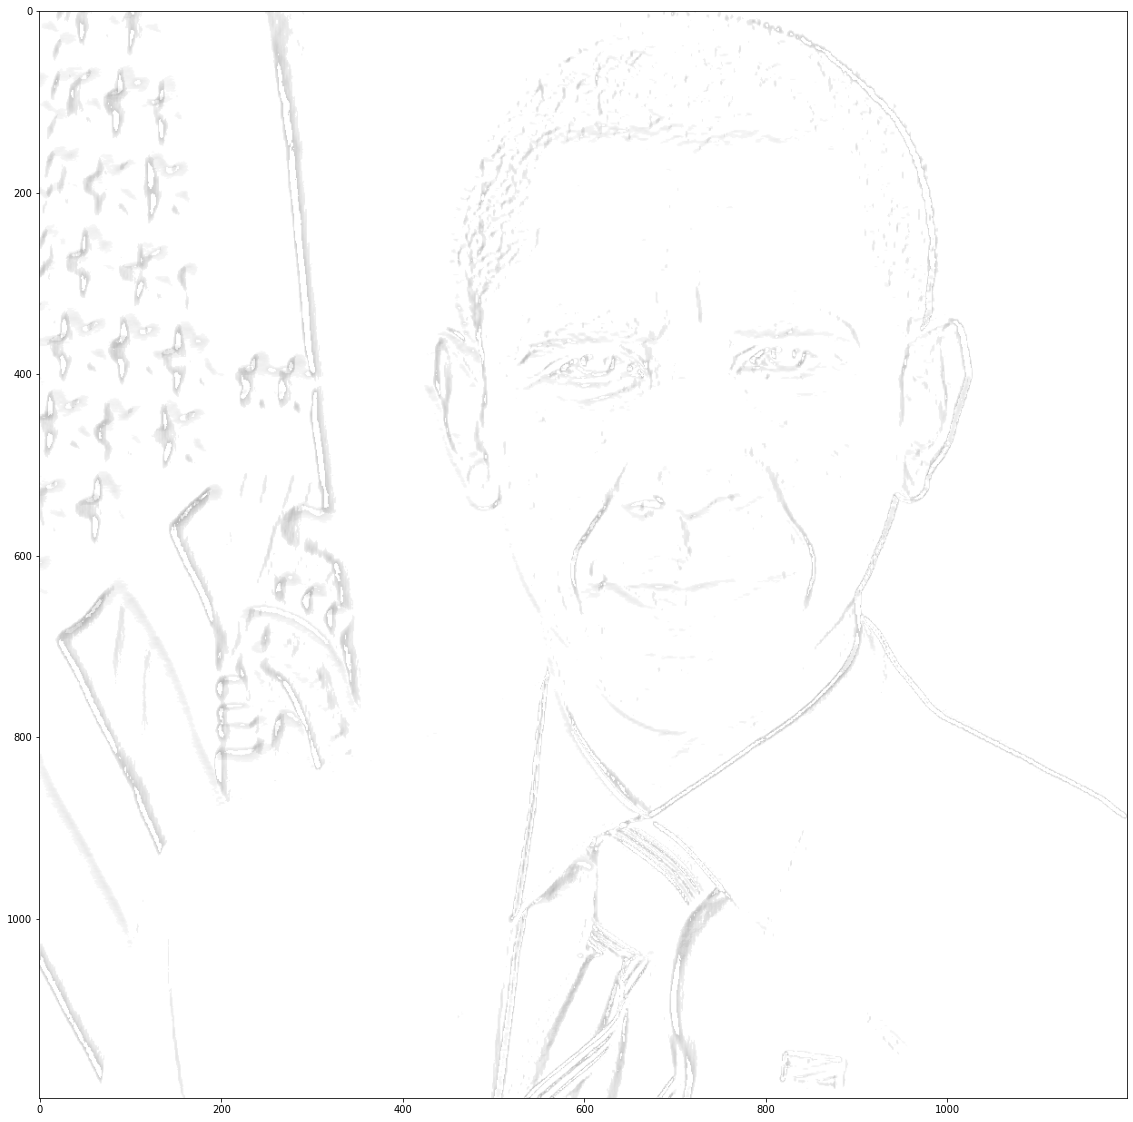

In [229]:
plt.imshow(bwcontour(activated_layer), cmap='gray')